# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rahmannuaji Satuhu
- **Email:** rahmannuaji@gmail.com
- **ID Dicoding:** rahmannuaji

## Menentukan Pertanyaan Bisnis

- Which season has the most bike rentals?
- What are the conditions like when the bicycle is used on a workingday, holiday, and weekday?
- Does the weather affect the number of bike rentals?
- What is the trend of bicycle use in a year, is 2011 or 2012 superior?
- How does register and casual users compare?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada bagian ini saya akan melakukan import data dengan dataset yang saya pilih yaitu **bike sharing dataset**

### **Day Data**

In [33]:
# Import Day Data
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Hour Data**

In [8]:
# Import Hour Data
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Memeriksa Tipe Data

In [10]:
# Tipe data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
# Tipe data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat output di atas adalah type data dari dataset yang dipakai

2. Cek Missing Value


In [13]:
# Cek Missing Value Day Data
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# Cek Missing value Hour data
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data di atas tidak terdapat missing value

3. Cek Duplicate Data

In [19]:
print("Count of Duplicate Day Data: ", day_df.duplicated().sum())

Count of Duplicate Day Data:  0


In [20]:
print("Count of Duplicate Hour Data: ", hour_df.duplicated().sum())

Count of Duplicate Hour Data:  0


4. Cek Descriptive Statistics Data

In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Karena pada pertanyaan bisnis kita tidak ada kaitannya dengan **hour_df** maka kita berfokus pada **day_df**

- Melakukan Drop Kolom yang tidak digunakan

In [34]:
# Melakukan drop pada kolom 'instant'
day_df.drop(['instant'],axis=1, inplace= True)

- Mengubah nama kolom

In [35]:
day_df.rename(columns={
    'dteday':'dateday',
    'yr':'year',
    'mnth': 'month',
    'cnt': 'count'}, inplace= True)
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Mengganti kategori angka menjadi keterangan

Season

In [36]:
# Season
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

Year

In [37]:
# Year
day_df['year'] = day_df['year'].map({
    0: '2011', 1:'2012'
})

Month

In [38]:
# Nama Bulan
day_df['month'] = day_df['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
    6: 'June',7: 'July', 8: 'August', 9: 'September', 10: 'October',
    11: 'November', 12: 'December'
})

Weekday

In [39]:
# Weekday
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
})

Weather Situation

In [40]:
#Weather_situation
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Partly Cloudy',
    2: 'Misty',
    3: 'Light Precipitation',
    4: 'Heavy Storm'
})

- Mengubah tipe data

Change data type to datetime

In [41]:
# Change data type to datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

Change data type to categorical

In [42]:
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,January,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,0,Tuesday,1,Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,0,Wednesday,1,Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Check Data Information

In [43]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

Ini merupakan data type setelah dilakukan perubahan

## Exploratory Data Analysis (EDA)

### Explore Data Day

In [57]:
# Jumlah rental untuk setiap season
day_df.groupby(by="season")['count'].sum().sort_values(ascending=False).reset_index().head()

,season,count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Dapat diketahui bahwa jumlah terbanyak untuk rental sepeda pasa musim 'Fall' dengan jumlah yaitu 1061129

In [58]:
# Jumlah rental tiap tahun berdasarkan registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Pada bagian ini dapat diketahui jumlah rental untuk setiap tahun pada user yang register dan casual

In [112]:
# Jumlah rental berdasarkan cuaca
day_df.groupby(by='weathersit').agg({
      "count" : ["sum","mean"]
    })

count             
                         sum         mean
weathersit                               
Light Precipitation    37869  1803.285714
Misty                 996858  4035.862348
Partly Cloudy        2257952  4876.786177

Dapat diketahui pada cuaca party cloudy banyak user yang melakukan rental sepeda dibanding cuaca lainnya

Text(0.5, 1.0, 'Feels Like Temperature vs Count')

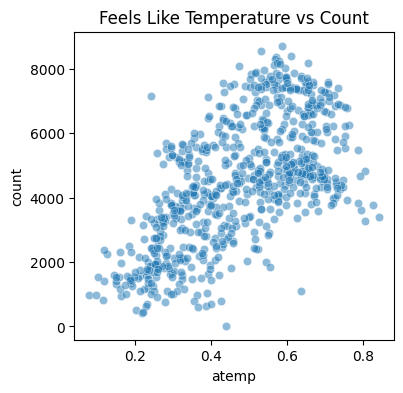

In [118]:
plt.figure(figsize=(14, 4))
# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

Pada plot EDA tersebut dapat diketahui atemp/ Feel Temperature memiliki hubungan yang positif terhadap count, dimana pengguna semakin naik jika temperature semakin naik.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which season has the most bike rentals?

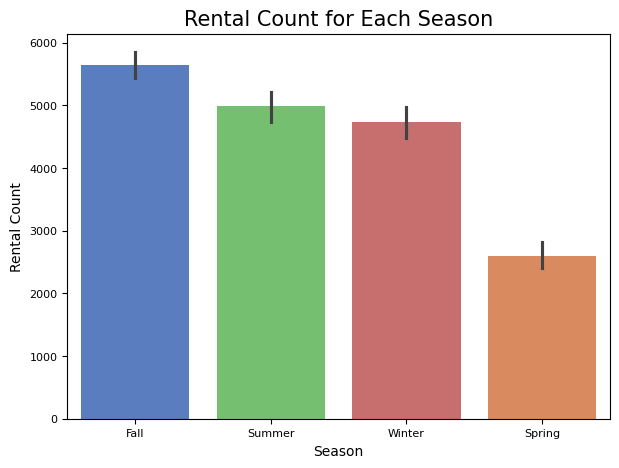

In [85]:
plt.figure(figsize=(7, 5))

sns.barplot(
    y="count",
    x="season",
    hue="season",
    data=day_df,
    palette="muted",
    order=day_df.groupby("season")["count"].sum().sort_values(ascending=False).index,
    legend=False
)

plt.title("Rental Count for Each Season", loc="center", fontsize=15)
plt.ylabel("Rental Count")
plt.xlabel("Season")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Berdasarkan visualisasi data di atas user sering melakukan rental sepeda pada musim "Fall" dan paling sedikit pada musim "Spring" dengan selisih yang cukup banyak.


### Pertanyaan 2: What are the conditions like when the bicycle is used on a workingday, holiday, and weekday?

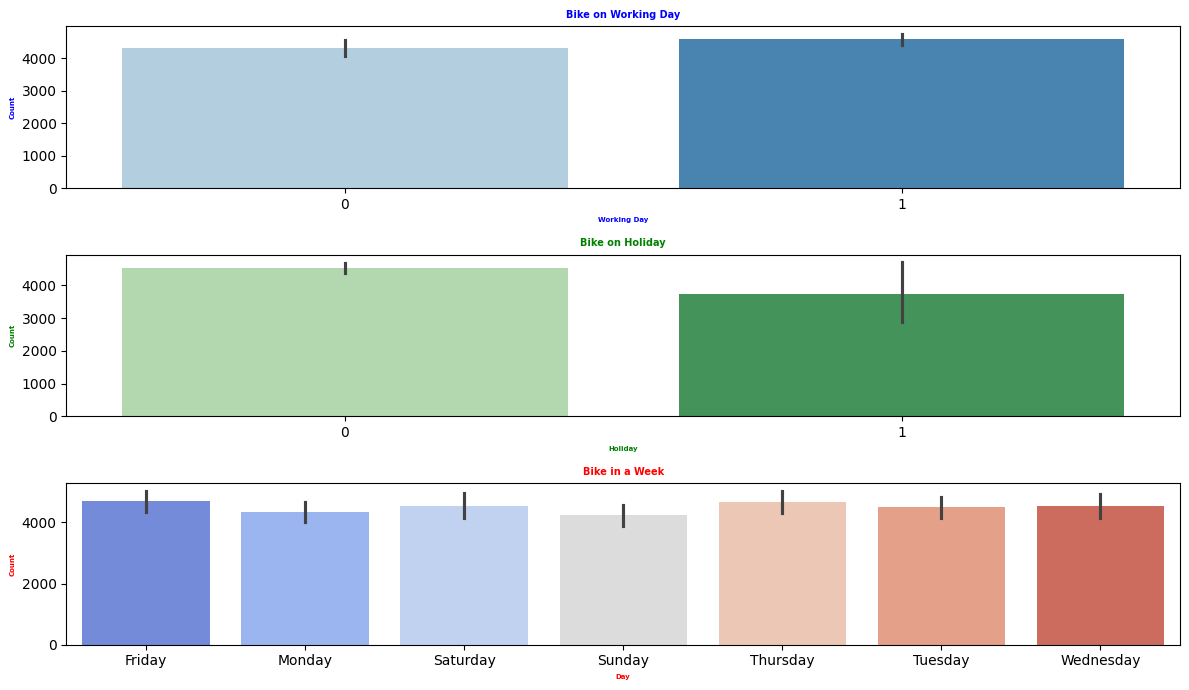

In [94]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,7))

# workingday
sns.barplot(
    x='workingday',
    y='count',
    hue = 'workingday',
    data=day_df,
    ax=axes[0],
    palette='Blues',
    legend=False)
axes[0].set_title('Bike on Working Day', fontsize=7, weight='bold', color='blue')
axes[0].set_xlabel('Working Day', fontsize=5, weight='bold', color='blue')
axes[0].set_ylabel('Count', fontsize=5, weight='bold', color='blue')

# holiday
sns.barplot(
  x='holiday',
  y='count',
  hue= 'holiday',
  data=day_df,
  ax=axes[1],
  palette='Greens',
  legend=False)
axes[1].set_title('Bike on Holiday', fontsize=7, weight='bold', color='green')
axes[1].set_xlabel('Holiday', fontsize=5, weight='bold', color='green')
axes[1].set_ylabel('Count', fontsize=5, weight='bold', color='green')

# weekday
sns.barplot(
  x='weekday',
  y='count',
  hue='weekday',
  data=day_df,
  ax=axes[2],
  palette='coolwarm',
  legend=False)
axes[2].set_title('Bike in a Week', fontsize=7, weight='bold', color='red')
axes[2].set_xlabel('Day', fontsize=5, weight='bold', color='red')
axes[2].set_ylabel('Count', fontsize=5, weight='bold', color='red')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi data diatas menggunakan barplot, didapat pernyataan sebagai berikut:

- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada akhir pekan (yakni sabtu dan minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.
- Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).
- Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 3: Does the weather affect the number of bike rentals?

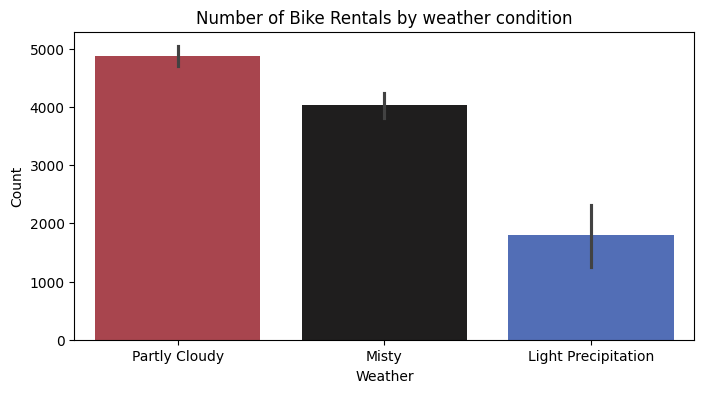

In [103]:
plt.figure(figsize=(8,4))
sns.barplot(
    x='weathersit',
    y='count',
    hue='weathersit',
    data=day_df,
    palette='icefire',
    order=day_df.groupby("weathersit")["count"].sum().sort_values(ascending=False).index)

plt.title('Number of Bike Rentals by weather condition')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

Berdasarkan visualisasi di atas dapat diketahui user sering melakukan rental sepeda pada saat cuaca cerah berawan, selanjutnya diikuti dengan cuaca berkabut, dan dilanjut dengan cuaca hujan ringan. User tidak pernah melakukan rental sepeda di cuaca ekstrim.

### Pertanyaan 4: What is the trend of bicycle use in a year, is 2011 or 2012 superior?

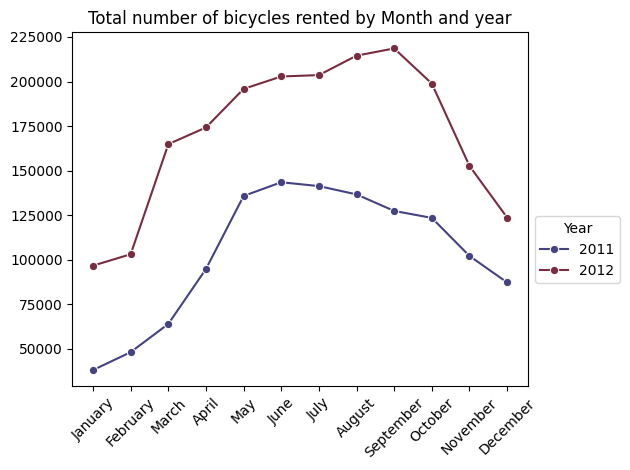

In [107]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['January','February','March','April','May',
     'June','July','August','September','October','November','December'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="icefire",
    marker="o")

plt.title("Total number of bicycles rented by Month and year")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut menggunakan linechart, dapat disimpulkan bahwa tahun 2012 lebih banyak user yang melakukan rental dari bulan januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.

### Pertanyaan 5: How does register and casual users compare?

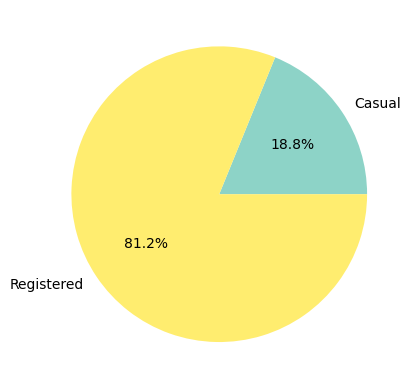

In [110]:
total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])

data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))  # Menghasilkan warna dari palet "Set3"

plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors)

plt.show()

User yang memilih registered sebanyak 81.2% dan sebaliknya user yang memilih casual sebanyak 18.8%

## Conclusion

- Conclution pertanyaan 1: Dapat terlihat jelas bahwa musim "fall" memiliki user yang melakukan penyewaan sepeda paling banyak dibanding musim-musim yang lain
- Conclution pertanyaan 2: Kondisi yang tampak pada visualisasi ini terbagi menjadi tiga bagian. Untuk jumlah pengguna sepeda berdasarkan workingday, workingday lah yang mengungguli non-workingday walaupun hasilnya memang tidak terlalu signifikan. Berdasarkan holiday, disini non-holidaylah yang menang dengan perbedaan yang cukup signifikan daripada yang holiday. Hal ini mungkin pengguna lebih menyukai sewa sepeda saat hari-hari biasa saja.
- Conclution pertanyaan 3: Dapat terlihat jelas terdapat hubungan diantara keduanya. Para penyewa sepeda sangat menyukai ketika cuaca sedang Cerah berawan, diikuti berkabut, hujan ringan, dan tidak ada yang melakukan rental pada cuaca esktrim.
- Conclution pertanyaan 4: Melalui visualisasi tersebut menggunakan linechart, dapat disimpulkan bahwa tahun 2012 lebih banyak user yang melakukan rental dari bulan januari sampai desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari.
- Conclution pertanyaan 5: User lebih memilih untuk melakukan register dibanding dengan casual, perbandingan antara keduanya juga cukup jauh.


## Analisis Lanjutan

RFM Analysis

- Recency (Seberapa baru pelanggan melakukan pembelian. Semakin baru pembelian dilakukan, semakin tinggi skor recency-nya)
- Frequency (Seberapa sering pelanggan melakukan pembelian. Semakin sering mereka membeli, semakin tinggi skor frequency-nya)
- Monetary ( Berapa banyak uang yang dihabiskan pelanggan. Semakin banyak uang yang dihabiskan, semakin tinggi skor monetary-nya)

In [123]:
#Import Data Again
day_df2 = pd.read_csv('/content/day.csv')

#Mengubah format data
day_df2['dteday'] = pd.to_datetime(day_df2.dteday)

# Mendapatkan tanggal terbaru dalam data
recent_date = day_df2['dteday'].max()

# Menghitung recency, frequency, dan monetary
rfm = day_df2.groupby('weathersit').agg({
    'dteday': lambda x: (recent_date - x.max()).days,  # Recency
    'weathersit': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
})

# Mengubah nama kolom
rfm.rename(columns={'dteday': 'Recency', 'instant': 'Frequency', 'cnt': 'Monetary'}, inplace=True)

# Menampilkan hasil RFM analysis
print(rfm)
print("Keterangan")
print("- 1: Clear, Few clouds, Partly cloudy, Partly cloudy")
print("- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist")
print("- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds")
print("- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")

            Recency  weathersit  Monetary
weathersit                               
1                 1         463   2257952
2                 0         247    996858
3                 5          21     37869
Keterangan
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
